**кластеризатор DBSCAN**


Евгений Борисов borisov.e@solarl.ru

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import random

---

In [2]:
# X = np.vstack([ 
#       np.loadtxt('../data/800_2b/points_1.txt'), 
#       np.loadtxt('../data/800_2b/points_2.txt') 
#     ])

In [3]:
X = np.loadtxt('../data/360_1/points_1.txt')

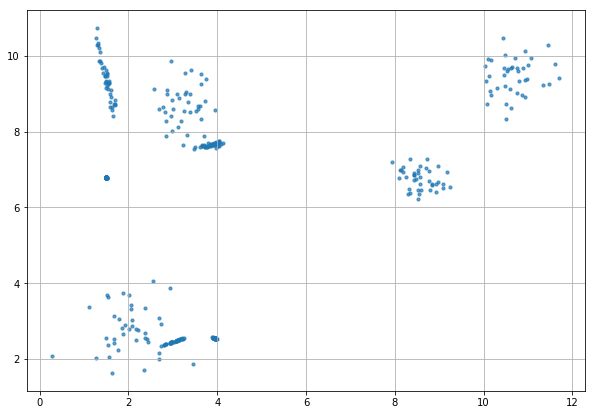

In [4]:
plt.figure(figsize=(10,7))
plt.scatter( x=X[:,0], y=X[:,1], s=10, alpha=0.7 )
plt.grid()
plt.show()

---

In [5]:
max_rad = 1.1 # размер окрестности точки
min_clst_size = 10 # минимальное количесто элементов в кластере

In [6]:
# матрица расстояний
R = euclidean_distances(X)
# список номеров неразмеченных точек
U = list(range(X.shape[0]))
Unz = set() # кандидаты в "шумовые" точки
clust = [] # результаты, списки номеров точек кластеров

In [7]:
max_iter = 1000
for i in range(max_iter):
    # выбираем (случайно) точку из неразмеченных
    c = random.choice(U) 

    # собираем кластер радиуса max_rad вокруг c
    K = [ ui for ui in U if R[c,ui] < max_rad ]

    # если в окрестности точки с мало соседей
    if len(K) < min_clst_size: 
        Unz.add(c) # то помечаем с как шум
        if len(set(U)-Unz)<1: 
            # все некластеризированные точки помечены как шум
            break # завершаем работу
    else:    
        
        # иначе обрабатываем соседей точек кластера K

        # для каждого элемента K собираем окрестность 
        K = { ki : [ ui for ui in U if (R[ki,ui]<max_rad) ] for ki in K }    

        # проверяем окрестности точек K 

        # "корневые" элементы кластера
        K_root = [ ki for ki in K if len(K[ki])>min_clst_size ]

        # "граничные" элементы кластера
        K_margin = [ ki for ki in K if len(K[ki])<(min_clst_size-1) ]

        # собираем кластер 
        K = [ K[ki] for ki in K_root ] 
        K = set(sum(K,[])) | set(K_margin)

        U = list( set(U) - K ) # помечаем точки кластера как обработанные
        Unz = set(Unz) - K # удаляем точки кластера из списка шумовых точек

        clust.append(list(K))

Unz = list(Unz)

In [8]:
len(clust), len(U),len(Unz), i

(6, 1, 1, 6)

---

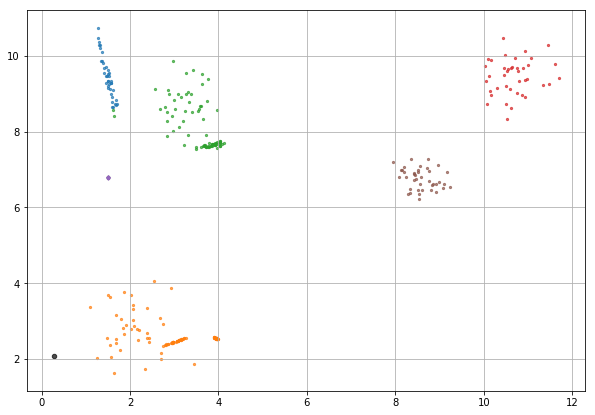

In [9]:
plt.figure(figsize=(10,7))
for c in clust:
    plt.scatter( x=X[c,0], y=X[c,1], s=5, alpha=0.7 )
      
plt.scatter( x=X[Unz,0], y=X[Unz,1], s=20, alpha=0.7, c='k' )
 
plt.grid()
plt.savefig('res-dbscan.png')
plt.show()